# Chapter 2: Risk Metrics #
&copy; 2019 Kenneth Winston

If risk is _lack of information about the future_, and measurement is _the act of determining a quantity with precision_, then the phrase _risk measurement_ is at war with itself. It is only possible to measure Knightian risk, where all the outcomes and all their probabilities are known _a priori_. Thus a casino can <u>measure</u> the risk that a lucky bettor will win a million dollars at roulette.

But real-world economic activity cannot be fully described by Knightian risk, so risk in financial markets cannot really be measured. It can only be <u>estimated</u>. At best, there might be extensive empirical experience with a relevant quantity, along with a strong rational basis for certain kinds of behaviors, that allow the analyst to estimate risk with a high degree of confidence. At worst, a situation might fall into the abyss of Knight's lowest category where "there is no valid basis of any kind" to classify risks.

Estimating _risk metrics_ is a worthwhile activity: it imparts discipline and transparency to the process of analyzing risk. Discipline and transparency in turn allow the metrics, and the process of estimating them, to improve over time. However, the usual caution applies: false precision needs to be counterbalanced by common sense.

One of the oldest risk metrics is volatility: the more a quantity varies, the less sure we are about its future. We will discuss this metric in detail in Chapter 4. In this chapter, we'll discuss Value at Risk, a metric widely used by some financial market participants, along with related metrics. We'll discuss coherent risk measures, also intended for use by financial market participants.

We'll then discuss pricing kernels, also known as stochastic discount factors and intertemporal marginal rates of substitution. Pricing kernels are not widely used by financial market practitioners, but are a central paradigm for economists. We'll discuss some recent work that has improved the testability of stochastic discount factor theory, possibly positioning the theory for wider use by financial market practitioners.

## 2.1 Caveat Laws
<a name="caveat_laws"></a>

Many commentators have captured the problem with the phrase _risk measurement_, or indeed any "measurement" of economic or financial parameters: when measurable patterns begin to emerge in markets and economies, the participants in those markets and economies see the patterns and change their behaviors, changing the patterns.

An early version of this sentiment is _Goodhart's Law_, named after British economist Charles Goodhart's statement in 1974:
>Any statistical relationship will break down when used for policy purposes.

Goodhart was talking about Frank Knight's second category of risk &mdash; statistical probability (section [(1.1)](#frank_knight) &mdash; in the context of public policy targets set by the [Bank of England](https://www.bankofengland.co.uk/about/history), the central bank of the United Kingdom. As soon as economic actors know that there is a target, they will alter their behavior so that (for example) events that only happened 1% of the time in the past now happen more often.

Goodhart's Law was extended by [J&oacute;n Dan&iacute;elsson in 2002](https://doi.org/10.1016/S0378-4266(02)00263-7) to say
>A risk model breaks down when used for its intended purpose.

Dan&iacute;elsson pointed out that some people assume in error that
>...the role of the risk forecaster is akin to a meteorologists job, who can forecast the weather, but not influence it. [But] if risk measurements influence people's behavior, it is inappropriate to assume market prices follow an independent stochastic process.

Similarly, most economists are keenly aware of the [Nobel Laureate Robert Lucas's](https://www.nobelprize.org/prizes/economic-sciences/1995/lucas/biographical) version of the idea, called the _Lucas Critique_[$^1$](#two_footnotes):
>Given that the structure of an econometric model consists of optimal decision rules of economic agents, and that optimal decision rules vary systematically with changes in the structure of series relevant to the decision maker, it follows that any change in policy will systematically alter the structure of econometric models.

These cautionary statements are daunting; if nothing works, then why bother? An answer can be obtained by thinking about these two statements:
1. All humans are giraffes, except the ones who aren't.
2. All humans have five fingers on each hand, except the ones who don't.
<a name="five_fingers"></a>

Both statements are true, but the first one is only vacuously true: everyone falls into the exception category. But as an approximation to human fingerness, five is pretty good: there aren't that many exceptions. For many practical purposes &mdash; for example, for a glove manufacturer setting up a mold for his glove-making machine &mdash; it suffices to say that humans have five fingers on each hand. However if someone were to bet a billion dollars that every human has five fingers on each hand, [hyperdactyl people](http://www.nbcnews.com/id/44312666/ns/health-mens_health/t/man-calls-his-fingers-toes-blessing) would arrive to collect:
![](six_fingers.jpg)

For our purposes, the rendering of this common theme might be:
>All laws in mathematical finance have counterexamples, except this one. Risk management should be made as rigorous as possible, but no more rigorous.

The mathematics of finance and economics can be beautiful and deep, and resulting metrics can be appealingly precise, but they are not really binding as they would be in mathematics or physics. There are always exceptions, some of them engendered by the very act of stating the "theorem" or "law." A liberal application of common sense is needed to see whether or not we are inadvertently encouraging searches for hyperdactyly. But if results and metrics are seen as guides to intuition rather than irrevocable laws, they can be quite useful.

## 2.2 VaR, ES, and cVaR ##

A natural question to ask when making a risky investment is: how bad can things get?

The problem with this question is that there's no limit to the range of possibilities. Whatever terrible situation we can imagine can usually be one-upped by an even more terrible one. At some point we descend into absurdity, speculating perhaps that evil aliens with hopelessly superior technology land on Earth and destroy all human life. While this morbid scenario is not utterly impossible, it's highly unrealistic to the point where there's nothing we could or should do about it. Such extreme speculation is not a guide to actions we should take now.

A more interesting question is: how bad are the things that can realistically happen that we might have a chance of planning for and doing something about? This seems more down-to-earth, but we need to know what "realistically" means.

A measure called _Value at Risk_ (or VaR[$^2$](#two_footnotes)) was created to answer the question “how bad can things get _realistically_.” It's now widely used and, in some cases, [required by financial regulators](https://www.govinfo.gov/content/pkg/CFR-2012-title12-vol3/pdf/CFR-2012-title12-vol3-part225-appE.pdf) to be computed and acted on. 

VaR is simply a percentile of a probability distribution of wealth[$^3$](#two_footnotes). Let $F_t(w)$ be the cumulative distribution function for the wealth of an institution or portfolio at some time $t$ years in the future. ($t$ might be denominated in other time units like days and is often left implicit.) For a probability $0\leq p\leq 1$, we find the amount of wealth $w_p$ so that $F_t(w_p)=1-p$. $w_p$ is called the _$t$-year $p$-Value at Risk_.

For example, if a bank wants to estimate how bad things can get in its trading operations, the random variable of interest might be $w$, the net value of its trading capital at the end of tomorrow's trading day. The 99% one-day VaR for its trading operations would be the level that $w$ was expected to exceed, 99 days out of 100. So if the 99% one-day VaR is \\$100,000,000, $w$ is expected to be no less than \\$100,000,000 on 99 out of 100 trading days.

Here's a problem with VaR: suppose a trader at the \\$100,000,000 99% one-day VaR bank has established a strategy where every day, she sells \\$100,000 worth of options that have only a 1-in-200 chance of paying off. If the options don't pay off the bank will keep the \\$100,000, but if they do pay off, the bank will owe \\$1,000,000,000. The 99% VaR calculation does not "see" the 99.5% quantile where the options strategy pays off (i.e. loses); it only sees the \\$100,000 profits and deems the trade riskless. But the chance that the bank owes a billion dollars is $1-.995^n$ where $n$ is the number of days the strategy is employed; in about six months, there will be a greater-than-50% chance that the bank will owe a billion dollars, possibly wiping out its trading capital.

By drawing a line at 99%, the bank actually encouraged behavior just on the other side of the 99% threshold. This is an example of the caveat laws we saw above. Our example bank tried to define "how bad can things get _realistically_" to exclude far-fetched scenarios like alien invasions. But as soon as that definition was in place, economic actors were encouraged to engage in behavior that was now deemed far-fetched but that wasn't actually at alien invasion levels of absurdity. We will see that there are better measures than VaR, but any measure is subject to gaming. Further, if more market participants engage in strategies that are just on the other side of the line, their aggregate behavior changes the probabilities so their strategies might no longer be just on the other side of the line.

The more formal definition of Value at Risk (VaR) is:
$$VaR(p)=\inf\{x\mid Pr(-X\le x)\ge p\}\label{eq:vardef}\tag{2.1}$$

where $X$ is the random variable of interest giving future P&L or rate of return. If the random variable of interest is $W$, an absolute amount of wealth, let $X=W-W_0$ where $W_0$ is starting wealth and let $VaR_W(p)=VaR_X(p)+W_0$, where $VaR_X(p)$ is as defined in $\eqref{eq:vardef}$. If $X$ is in P&L terms, then $–X$ is the distribution of losses, where a bigger number means a bigger loss. The definition says we find the smallest loss $x$ that is greater than or equal to a fraction $p$ of losses. If $X$ has a continuous cumulative distribution function $F$, then we can write
$$VaR(p)=-F^{-1}(1-p);\hspace{2em}VaR(p)=x \iff \int_{-\infty}^{-x}dF(y)=1-p\tag{2.2}$$

[Acerbi and Tausche 2002](http://www.bis.org/bcbs/ca/acertasc.pdf) defined _Expected Shortfall_ as an average of the “bad” VaRs:
$$ES(p)=\frac{1}{1-p}\int_p^1{VaR(z)dz}\label{eq:esdef}\tag{2.3}$$

If there is a continuous cdf $F$, then we can use the [Rockafellar and Uryasev 2000](https://www.risk.net/journal-risk/2161159/optimization-conditional-value-risk) definition of _cVaR, or conditional Value at Risk_. It is the expected value given that you are in the VaR tail:
$$cVaR(p)=\frac{-1}{1-p}\int_{-\infty}^{-VaR(p)}{ydF(y)}\label{eq:cvardef}\tag{2.4}$$
Note that when there is a continuous cdf $F$, the change of variable $1-z=F(y)$ in the definition of $ES(p)$ makes it equivalent to $cVaR(p)$.

The $\frac{1}{1-p}$ factor on the right of \eqref{eq:esdef} and \eqref{eq:cvardef} normalizes the probability density functions so they integrate to one in the tail. For ES, the pdf is uniform, while for cVaR the pdf is the pdf of the random variable X.

Figure 2.1 generates 1000 random numbers and computes the sample 99% VaR &mdash; the number at the $1^{st}$ percentile of the distribution. A useful convention when analyzing sample distributions consisting of $n$ points is to assume that the $i^{th}$ point is the $\frac{i}{n+1}$ percentile of the distribution, thereby allowing for more extreme values at either end than the ones that have been observed so far. So the first percentile of the 1000 numbers is a little bigger than the $10^{th}$ smallest observation (i.e. the loss is a little less). The code also computes the average of the observations that are less than 99% VaR and displays that average (red line) as cVaR:

99% VaR is  11.786946230195891
99% cVaR is  14.965989250046896


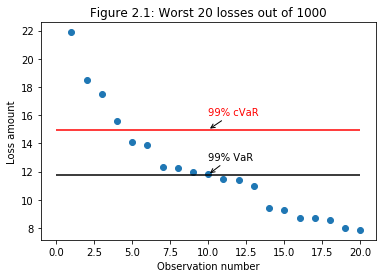

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as spst

#Generate some random numbers and show VaR and cVaR

#Generate 90% low vol, 10% high vol random numbers
y=np.concatenate((np.random.normal(0,1,900),np.random.normal(0,10,100)))
y.sort()  #Put them in order

p=.99
p100=p*100.
p_string="%0.0f"% p100

# Compute sample p-VaR
#numpy percentile function does the wrong thing - assumes first observation
#is 0 percentile and last is 100th. Cure that by adding extra observations
#at each end.
z=np.insert(y,0,y[0]-1)
z=np.append(z,z[-1]+1)
VaRp=-np.percentile(z,(1-p)*100)
pv_string=p_string+"% VaR is "
print(pv_string,VaRp)
# Compute sample p-cVaR with interpolation
n=len(y)
nv=int(n*(1-p))
cVaRp=-(np.sum([yy for yy in y if yy<=-VaRp])+nv/n*y[nv])/((n+1)*(1-p))
pcv_string=p_string+"% cVaR is "
print(pcv_string,cVaRp)

plt.scatter(range(1,21),-y[:20])
plt.annotate(p_string+"% VaR", xy=(10.0, VaRp), xytext=(10.0, VaRp+1),
            arrowprops=dict(arrowstyle='->',
                    facecolor='black'))
plt.hlines(VaRp,0,20)

plt.annotate(p_string+"% cVaR", xy=(10.0, cVaRp), xytext=(10.0, cVaRp+1),
            color='red', arrowprops=dict(arrowstyle='->',
                    facecolor='red'))
plt.hlines(cVaRp,0,20,colors='red')

plt.title('Figure 2.1: Worst 20 losses out of 1000')
plt.xlabel('Observation number')
plt.ylabel('Loss amount')
plt.show();

For a normal distribution, cVaR equals ES because it's continuous. If $Norm^{-1}(z)$ is the inverse standard normal function (so that $z=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{Norm^{-1}(z)}\exp\bigl(\frac{-x^2}{2}\bigr)dx$), then the p-Value-at-Risk of a normal distribution with mean $\mu$ and variance $\sigma^2$ is
$$VaR_{Norm}(p)=-(\mu+\sigma Norm^{-1}(1-p))\label{eq:normal_var}\tag{2.5}$$
So the cVaR is
$$cVaR_{Norm}(p)=-\mu+\frac{-1}{1-p}\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{-v}{y\exp\bigl(\frac{-y^2}{2\sigma^2}\bigr)dy}=-\mu+\frac{\sigma}{(1-p)\sqrt{2\pi}}\exp\bigl(\frac{-v^2}{2\sigma^2}\bigr)
\label{eq:normal_cvar}\tag{2.6}$$
where for brevity we have let $v=VaR_{Norm}(p)$.

Computing that for the random data we've just seen, we get:

In [134]:
from scipy.stats import norm
#Get mean and standard deviation of the data
samp_mean=np.mean(y)
samp_std=np.std(y)

#Show normal VaR vs sample VaR
nVaRp=-(samp_mean+samp_std*norm.ppf(1-p))
pv_string=p_string+"% Sample VaR is "
print(pv_string,VaRp)
pvn_string=p_string+"% Normal VaR is "
print(pvn_string,nVaRp)

# Get normal cVaR
ncVaRp=-samp_mean+samp_std*np.exp(-.5*(nVaRp/samp_std)**2)/((1-p)*np.sqrt(2*np.pi))
pcv_string=p_string+"% Sample cVaR is "
print(pcv_string,cVaRp)
pncv_string=p_string+"% Normal cVaR is "
print(pncv_string,ncVaRp)                                                          

99% Sample VaR is  12.658739276974627
99% Normal VaR is  7.745733053431554
99% Sample cVaR is  17.292335913318755
99% Normal cVaR is  8.45704276575081


The random sample has worse empirical VaR and much worse cVaR than a normal distribution. We will see in Chapter 6 that this is not unusual.

Discrete distributions can sometimes cause problems. Consider for example the toss of a weighted coin that 2% of the time loses \\$100, and gains \\$1 the other 98% of the time. The pdf $f$ is a mass function; $f(-100)=.02$; $f(1)=.98$. From \eqref{eq:vardef} we see that $VaR(p)=100$ for $p\geq 98\%$; $VaR(p)=-1$ for $p<98\%$.

We now calculate 99% ES and 99% cVaR for this distribution.
- For the ES calculation, the $VaR(z)$ in the integral is a constant: 100. So $ES(99\%)=VaR(99\%)=100$.
- For the cVaR calculation, the integral in \eqref{eq:cvardef} ranges from $-\infty$ to $-VaR(99\%)=-100$. The $dF(y)$ term equals $f(y)dy$ where $f$ is the probability mass function, which in this range is only nonzero at $y=-100$ where it equals .02. So the $cVaR(99\%)=200$.

So ES and cVaR don't agree here. Usually some kind of interpolation or extrapolation can be applied between probability mass points to fix things up, assuming that such manipulation does not irrevocably depart from the underlying process.

## 2.3 Coherent Risk ##
<a name="coherent_risk"></a>

In the late 1990s, four co-authors [Artzner, Delbaen, Eber and Heath ("ADEH")](https://people.math.ethz.ch/~delbaen/ftp/preprints/CoherentMF.pdf) postulated a series of mathematical axioms that, they claimed, any reasonable ("coherent") measure of financial risk should have. They were trying to avoid damaging situations like the trader's option strategy described in the previous section.

ADEH's definition of risk is more accounting-oriented than the essentially probabilistic Knight definitions. For ADEH, risk is how much cash has to be put into a portfolio to make it acceptable. An "acceptable" portfolio is one that passes regulatory or other hurdles. So to ADEH, risk is a peril &mdash; the chance of having an unacceptable portfolio &mdash; and the metric for risk is the size of the monetary fortification you need to build to protect yourself from the peril.

For example if your portfolio contains the previous section's options trading strategy, losing a billion dollars would probably be unacceptable. Maybe "acceptable" means never having less than \\$100,000,000. If you added \\$1,100,000,000 in cash to that portfolio, you'd eliminate the possibility of ending up below the threshhold, making the portfolio (or at least that part of the portfolio) acceptable. The ADEH-type risk of the options trade might then be \\$1.1 billion.

More formally, ADEH defined a _risk measure_ as a mapping from a random variable $X$ to the real numbers. $X$ could be an amount of money; a change in an amount of money; or a rate of return. The outcome space $\Omega$ (which ADEH assume is finite) encompasses all relevant economic conditions one period forward.

ADEH assumed there is a single risk-free investment $R_f$ (a nonrandom random variable specifying how much wealth \\$1 invested in a sure thing will produce one period forward). They put forward four axioms that sensible risk measures $\rho$ must satisfy.
- Axiom T (**Translation Invariance**):
$\rho(X+\alpha R_f)=\rho(X)-\alpha$. This says we can decrease our risk by adding cash to our portfolio. ADEH point out that this means $\rho(X+\rho(X)R_f)=0$, i.e. $\rho(X)$ is the amount of cash that will eliminate risk.
- Axiom S (**Subadditivity**):
$\rho(X+Y)\leq\rho(X)+\rho(Y)$. This says diversification helps, or at least doesn’t hurt, to reduce risk. ADEH note that if this were not true, entities (trading desks, banks, companies, portfolios) would be encouraged to split up into pieces to give the appearance of having less risk. 
- Axiom PH (**Positive Homogeneity**):
If $\lambda\geq0$, then $\rho(\lambda X)=\lambda\rho(X)$. We know from Axiom S that $\rho(nX)\leq n\rho(X)$. This says that equality holds, and fills in between the integers. In effect this ignores liquidity risk[$^4$](#two_footnotes), which ADEH acknowledge; they are focused on whether an amount of money is sufficient or not.
- Axiom M (**Monotonicity**): 
If $X\leq Y$, then $\rho(Y)\leq \rho(X)$. Here $X\leq Y$ means that the random variable $Y$ statewise dominates the random variable $X$ (section [(1.7)](#basic_probability_terminology)). So this axiom says that having more money is less risky than having less money.

A risk measure satisfying these four axioms is called _coherent_.

To see whether you've understood coherent risk, see if you can resolve the following puzzle:
>Suppose $X$ is a random variable that gives us more money than we have now under any circumstances; say $X(0)=0$ where 0 is the current time, and $X(1)=2$ or $X(1)=4$ with equal probability at time 1 in the future. Let $Y=2X$. Axiom PH says $\rho(Y)=2\rho(X)$. But Axiom M says $\rho(Y)\leq \rho(X)$. How can both statements be true?

The axioms of subadditivity and positive homogeneity are sometimes replaced by a single, weaker axiom:
- Axiom C (**Convexity**)
If $1\geq λ\geq 0$, then $\rho(\lambda X+(1-\lambda)Y)\leq\lambda\rho(X)+(1-\lambda)\rho(Y)$.

A risk measure satisfying translation invariance, convexity, and monotonicity is called a _convex_ risk measure.

We've already seen an unfortunate failing of the VaR measure - it fails to detect rare but disastrous events that are below the probability threshhold. But ADEH give another example that shows that VaR isn't convex, so it certainly isn't coherent.

Suppose we have two digital options on a stock. The first one, A, costs h at time 0 and pays 1000 at time 1 if the value of the stock is over some H, and 0 otherwise. The second digital option, B, costs l (lower case L) at time 0 and pays 1000 at time 1 if the value of the stock is under some L, and 0 otherwise. Here $L<H$.

The payoff profile of buying both A and B: you get 1000 if the stock ends up under L or over H, and nothing in between. Suppose we choose L and H so that $Pr(Stock<L)=Pr(Stock>H)=80bps$. A is a lottery ticket that pays off 1000 less than 1% of the time, and zero the rest of the time. Its expected value is 8, and any risk-averse utility function is going to value it less than 8. Even a risk-loving but reasonable utility function will value it closer to 8 than to 1000. Similarly for option B.

If the risk-free return relative rate is 1 (risk-free rate 0), then there is no time value of money to worry about and the 99% money VaR of writing (going short) 2 A’s is -2h, because 99.2% of the time the option does not pay off and you pocket 2h from writing the options. Having positive money is negative value at risk. Similarly the 99% money VaR of writing 2 B’s is -2l.

However, suppose you write one A and one B. The middle ground between L and H – the place where neither pays off – has $100\%-.8\%-.8\%=98.4\%$ probability. There is a $1.6\%$ chance the stock will end up either very low (less than L, where B pays off) or very high (greater than H, where A pays off). The 99% money VaR of writing one A and one B is 1000-l-h, a (large) positive number.

So this is another example of VaR not seeing concentrated risk. One A and one B is a better-diversified portfolio than two A’s. In effect the VaR measure encourages its users to double up on their low-probability bets (or triple up or quadruple up…). 

You can’t hide problems in the tail with expected shortfall/cVaR – they get averaged in. ES/cVaR does the right thing in the digital options example. It can be shown that expected shortfall (and therefore cVaR when there is a continuous cdf F) is a coherent risk measure.

## 2.4 Risk-Averse Prices ##

Most people are risk-averse and won't pay expected or average value for risky propositions. This was most apparent with the St. Petersburg lottery (section 1.4.1) whose expected value was infinite in its pure form, or perhaps around \\$48 when taking into account the limited wealth of the world. Bidding for this lottery usually centers around \\$4.

This risk aversion carries over into securities markets. An analog of the Generous Billionaires (section 1.4.2) is a company with a similar payoff pattern. Let's suppose that MiDCo is a pharmaceutical startup company developing a potential blockbuster drug that cures an inability to perform multiple integration without using a computational engine. MiDCo will be worth \\$1 billion one year from now if its testing phase is successful, and nothing if not. Suppose further that analysts agree that there is a probability $p$ that testing will succeed and a probability $1-p$ that it won't.

MiDCo issues 1 billion shares, i.e. each share represents ownership of one one-billionth of the company. For people with risk-neutral utility functions, a share is worth $p$ now (ignoring the time value of money). But we know that investors don’t have risk-neutral utility functions; they are generally risk-averse.

For example someone whose current wealth is $w$ and who has a logarithmic utility function might be considering an investment of a fraction $f$ of his total wealth in MiDCo. The security will be worth \\$1 per share if it's successful. If it's currently valued at $q$ per share, then its payoff factor on success is $1/q$ per share. The point of indifference between investing in this security and doing nothing is
$$p\cdot ln(w(1-f+f/q))+(1-p)\cdot ln(w(1-f))=ln(w)\tag{2.7}$$
That gives
$$q=\frac{f}{(1-f)^{1-1/p}-(1-f)}\tag{2.8}$$
When $f=0$, the investor is willing to pay $q=p$ per share, i.e. the price based on the security's expected value. In other words, if the investment is negligible to the investor, she is risk-neutral. But as $f\to1$, the risk of the investment becomes more and more of a concern so the price $q$ the investor is willing to pay approaches zero; that is, the payoff factor $1/q$ required to convince the investor to take the risk approaches infinity.

The code in the next cell generates isoprobability lines where each line shows the indifference price per share $q$ for a fixed $p$ at differing fractions of wealth $f$.

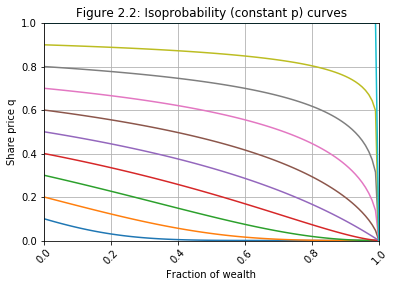

In [63]:
def SharePrice(f,p):
    #Price to pay when a fraction f of
    #wealth is invested in a gamble that pays 1 with probability
    #p and 0 otherwise, log-utility
    #See formula 2.7 above
    if (f<0) or (f>=1) or (p<0) or (p>1): #Can't bet anything
        return(0.0)
    if (f==0.0):              #Limiting amount
        return(p)
    if (p==1.0):
        return(1.0)
    one_minus_f=1-f
    denom=one_minus_f**(1-1/p)-one_minus_f
    return(f/denom)
#Done with SharePrice

#Generate isoprobability graphs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

frac_wealth = np.arange(0,1.01,.01) #compute at fractions of wealth ranging from 0 to 1 by .01's
prob = np.arange(.1,1.1,.1) #Compute isoprobability curves every 10% of probability
y=[]    #y will be array of arrays - each contained array an isoprobability curve
for i in range(10):
    iso_curve=[]
    for j in range(len(frac_wealth)):
        iso_curve.append(SharePrice(frac_wealth[j],prob[i]))
    y.append(iso_curve)   #tack on the isoprobability curve for this probability level

#Display the graph
fig, ax = plt.subplots()
for i in range(len(prob)):
    ax.plot(frac_wealth,y[i])
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
ax.grid()

plt.title('Figure 2.2: Isoprobability (constant p) curves')
plt.xlabel('Fraction of wealth')
plt.ylabel('Share price q')
plt.axis([0,1,0,1])
plt.show();

The maximum share price on each isoprobability curve in Figure 2.2 is $p$, the probability of success. But the price $q$ that investors are willing to pay drops as the fraction of wealth at risk gets higher and higher, because investors demand a premium to take the risk. Eventually with log-utility they just won't pay anything.

Different potential investors will have different levels of starting wealth, so their places on the X-axis of Figure 2.2 will vary. In practice no one has definitive knowledge of the probability of success $p$, so different investors will have different ideas about where to be on the Y-axis of Figure 2.2. In fact some or all potential investors may not even have log-utility functions. In fact they may not even act as if they have utility functions (see section 1.7.4).

All these complications are rather discouraging. Nonetheless, securities do manage to trade. Market participants come to a price they would be willing to pay (if they are potential buyers) or receive (if they are potential sellers) based on their combined thoughts about probability of success and risk preference. If the highest-price buyer has a price that is above or equal to the lowest-price seller, then a transaction will take place at a _market-clearing price $q$_ that matches up overlapping buyers and sellers. These buyers and sellers are cleared from the market since their wishes are fulfilled.

<a name="no_arbitrage"></a>
## 2.5 No-Arbitrage ##

Let's use "W" (for "win") to denote a share of MiDCo; W's price is $q$. And suppose that there exists a complementary security "L" (for "lose") that pays \\$1 if the multiple integration drug fails, and \\$0 if it succeeds. If I buy one W and one L, the combined position of the two securities will be worth \\$1 one year from now no matter what happens.

While W alone or L alone are risky securities - we don't know at the present time whether they will pay off or not - the combination W+L is risk-free. We know exactly what will happen to W+L in the future: no matter which outcome is realized, W+L will be worth \\$1. Therefore (ignoring for now the time value of money) W+L must be worth \\$1 today. If it's worth less than that - say \\$0.90 - we would borrow \\$0.90 to buy W+L, and in the future we'll always have \\$1 and owe \\$0.90, for a net profit of \\$0.10. That's free money - we got something for nothing.

A fundamental principle in markets is that there shouldn't be opportunities to make free money. If an investor can take on a position that costs nothing, and its value in at least one future state of the world is strictly positive while its value in no future state of the world is negative (i.e. the investor never owes money), then that's free money. Or equivalently, if taking on a position has a strictly negative cost (i.e. taking on the position gives money to the investor in the present time) while in all future states of the world the position's value is non-negative, then that's free money.

Such a free money position is called a _(risk-free) arbitrage_, and the assumed lack of such opportunities is called _no-arbitrage_. There can actually be risk in a risk-free arbitrage; there can be uncertainty about exactly how much free money the arbitrage will produce. A risk-free arbitrage is actually a _peril-free arbitrage_; there is no danger of losing money. But the "risk-free" label is universally used.

In practice arbitrages can and do exist. They can appear momentarily, for example due to mistakes by market participants. But vigilant investors will quickly see such mistakes and take advantage of them. The very act of taking advantage of arbitrages will eventually make them disappear, since the arbitrageur will exert pressure on prices in the right direction by buying too-cheap securities and selling too-expensive securities.

It is also possible for small arbitrages to exist because there may be costs involved in taking advantage of the arbitrage. For example, if the price of gold in New York is less than the price of gold in London, an arbitrageur could buy gold in New York and sell it in London. But as a practical matter gold dealers would charge a commission for the buy in New York and the sell in London, and it would cost something to transport the gold from New York to London. Further, the transportation would take a little time during which the price could change. There might be taxes in one or both locations. There might be regulatory restrictions on importing or exporting gold. The various impediments to pure theoretical arbitrage are collectively known as [Limits of Arbitrage](https://www.jstor.org/stable/2329555).

So the New York gold price might be a little different than the London gold price and it wouldn't be worth the cost of closing the gap. But if there's a big enough price difference, someone will arbitrage it away.

A general mathematical formulation of the no-arbitrage principle is the following: For any linear combination $a_1x_1+…+a_nx_n$ of securities $x_1,...,x_n$ where the current price of the combination is zero, then either (a) the price of the combination must be zero in all future states of the world; or (b) there must be at least one future state with a strictly positive price and at least one future state with a strictly negative price.

We noted above that we were ignoring the time value of money, but let's  take that into account now. We'll learn more about time value in Chapter 3, but for now note that money in the future is not the same as money now. Often we will assume there is a _risk-free rate $r_f$_ that translates money in the future into money now. $r_f$ might be the rate of interest paid by a completely reliable bank or government. So if such an institution is paying $r_f=3\%$ a year, then a dollar today is worth \\$1.03 one year from now no matter what happens; conversely a dollar in the future (one year from now) is worth $\frac{\$1}{1.03}$ now.


## 2.6 State Prices and Risk-Neutral Probabilities ##
<a name="state_prices"></a>

Returning to $W$ and $L$ - the securities that pay on a win for MiDCo and a loss for MiDCo, respectively - we will use the security $R_f$ from section [(2.3)](#coherent_risk) to account for the time value of money. It's worth \\$1 one year in the future, and therefore worth $\$\frac{1}{1+r_f}$ today. Suppose the price of $W+L$ today is less than the price of $R_f$. Then we would buy $W+L$ and sell a fraction $0<f<1$ of $R_f$ so that the current price of $W+L-fR_f$ is zero. The value of the linear combination $W+L-fR_f$ will be positive in all future states, violating the no-arbitrage principle. Similarly $W+L$'s current price cannot be more than the price of $R_f$, since we would do the arbitrage in the other direction.

Thus the no-arbitrage principle together with the time value of money indicates that the current price of $W+L$ must be $\$\frac{1}{1+r_f}$. If all investors were risk-neutral - if the prices of $W$ and $L$ just represented their assessments of the probabilities of success or failure without any adjustment - then the current price of $W$ would equal $\frac{p}{1+r_f}$ where $p$ is the market consensus probability of success. The price of the failure security $L$ must then be $\frac{1-p}{1+r_f}$ by no-arbitrage.

We have couched the outcomes of MiDCo in starkly binary terms - either it succeeds fully and $W$ ($L$) is worth \\$1 (\\$0) a share or it fails fully and $W$ ($L$) is worth \\$0 (\\$1) a share. That means these securities are examples of what economists call _state-price securities_ or _Arrow-Debreu contingent claims_. In financial markets, they are called _binary (or digital) options_, such as the ones used in ADEH's example of the problems with VaR in section [(2.3)](#coherent_risk). Such securities are indicator variables - they pay \\$1 contingent on the occurrence of some future event (e.g. drug success) and nothing if that event doesn't occur.

We know that investors are not risk-neutral, so the price of the W(in) security probably does not equal $\frac{p}{1+r_f}$. Let $q$ be the actual numerator, i.e. the price of $W$ equals $\frac{q}{1+r_f}$. From no-arbitrage we must have that the price of the failure security $L$ equals $\frac{1-q}{1+r_f}$. $q,1-q$ are said to form a _risk-neutral probability measure_ for the two-outcome space \{MiDCo success,MiDCo failure\}. The term "risk-neutral" in this context means "derived from observed state prices under the counterfactual assumption that market participants are risk-neutral."

More generally, we could suppose a standard Knightian or Von Neumann-Morgenstern framework with a finite sample space $\Omega=\{s_1,...,s_n\}$ that encompasses all possible future states. In that framework we assume there is a market in which we can observe the prices of a complete set of $n$ Arrow-Debreu contingent claims where the $i^{th}$ claim pays \\$1 if $s_i$ occurs one period into the future and \\$0 if not. Let $q_0(\omega)$ be the current price of the claim that pays off if state $\omega\in\Omega$ occurs, and let $q(\omega)=q_0(\omega)(1+r_f)$ to account for the time value of money. Then as above the no-arbitrage principle says $\sum_{\omega\in\Omega}q(\omega)=1$ since one and only one of the outcomes must occur. $q$ is the probability mass function for the risk-neutral probability space. If any $q(\omega)\leq 0$ then purchasing the claim on $\omega$ is a riskless arbitrage, so under no-arbitrage we have $q(\omega) > 0\ \forall \omega\in\Omega$.

Discrete state prices can be generalized to continuous state price densities when the outcome space is an interval on the real line representing monetary amounts or rates of return. Let $Q_0(x)$ be a cumulative state price function that pays \\$1 if the outcome is less than or equal to x, and \\$0 otherwise. If $Q_0$ is differentiable, then $q_0(x)=Q_0^{\prime}(x)$ is the state price density function. As in the finite case, an adjustment for the time value of money must be applied to the current functions to make them probability densities and cumulative distribution functions; in continuous situations it is customary to use the adjustment $exp(r_f)$ rather than $1+r_f$. (See section 3.4.1 for further discussion.) So $Q(x)=exp(r_f)Q_0(x)$ is a cdf and $q(x)=exp(r_f)q_0(x)$ is a pdf with the appropriate properties, assuming no-arbitrage.

Thus when there is no-arbitrage and a complete set of contingent claims on an outcome space $\Omega$, we can can construct a risk-neutral probability measure $Q$ by observing the market prices of the claims and adjusting by the risk-free rate.

## 2.7 Stochastic Discount Factors ##

The price of the MiDCo "win" security $W$, which we called $q/(1+r_f)$, does not tell us the market consensus probability that MiDCo will succeed. $q/(1+r_f)$ is contaminated by the aggregate aversion to risk, and perhaps other factors like need for liquidity. If we were able to poll every market participant we might find out what we'll call $p$, the aggregate assessment of MiDCo's success. But that's impractical, so $p$, called the _real-world_ or _natural_ probability, remains unobservable. However, economists have built up an elaborate mechanism that attempts to translate between risk-neutral and real-world probabilities.

The language here can be misleading. We've already pointed out that "risk-neutral" probabilities are based on market levels of risk aversion, which is anything but risk-neutral. The terms &mdash; "real-world" or "natural" probability &mdash; can also be misleading. Financial markets, as we have observed, are not generally subject to Knightian Risk. So the <u>real</u> real-world probabilities of events remain unknowable in advance. "Real-world" and "natural" probabilities are the market consensus _opinions_ of these quantities, not the unknowable facts.

Assume a one-period world with a current time where state prices are observable, and a future time where prices are known functions of outcome states, but where the outcome state is unknown in the present. Let $X$ be a random variable giving prices of a particular security; that is, $X$ maps future states $\omega$ into an interval of the real line representing prices. When the outcome space $\Omega$ is finite, we can write
$$Price(0,X)=\sum{X(\omega)q_0(\omega)}=\bigl(\sum q_0(\omega)\bigr)\bigl(\sum{X(\omega)\frac{q_0(\omega)}{\sum{q_0(\omega)}}}\bigr) =\frac{1}{1+r_f}\mathbb{E}_{Q}[X]\label{eq:sdf_discreteprice}\tag{2.10}$$
where $q_0(\omega)$ is the time-0 state price of outcome $\omega$, so the risk-neutral probability mass is $q(\omega)=\frac{q_0(\omega)}{\sum{q_0(\omega)}}$. The assumption that the sum of all state prices equals the time-0 value $\frac{1}{1+r_f}$ of a risk-free instrument is a result of the absence of arbitrage as we saw in section [(2.6)](#state_prices).

Similarly the continuous version is
$$Price(0,X)=\int{X(\omega)dS(\omega)}=\bigl(\int dQ_0(\omega)\bigr)\bigl(\int{X(\omega)\frac{dQ_0(\omega)}{\int{dQ_0(\omega)}}}\bigr)$$
$$=exp(-r_f)\mathbb{E}_{Q}[X]\tag{2.11}$$
for the current (time-0) price of $X$, where $Q_0(\omega)$ is the current price of a security that pays \\$1 if the outcome is less than or equal to $\omega$ and \\$0 otherwise. The risk-neutral cdf is $Q(\omega)=\frac{Q_0(\Omega)}{\int{dQ_0(\omega)}}$. Note we have shifted the discounting factor from $\frac{1}{1+r_f}$ to $exp(-r_f)$; see section 3.4.1 below for further discussion of discounting conventions.

If $P$ is the real-world or natural probability measure where (in the finite version) $p(\omega)$ is the market consensus probability that outcome $\omega$ will occur, then we can define the expected value of a security $X$ under the $P$ probability measure as
$$\mathbb{E}_{P}[X]=\sum{p(\omega) X(\omega)}\tag{2.12}$$
Define a random variable $\varphi(\omega)=q(\omega)/p(\omega)$ (where $q(\omega)$ is the time-0 state price of $\omega$). Then with no-arbitrage we can say
$$\mathbb{E}_{P}[\varphi X]=exp(-r_f)\mathbb{E}_Q[X]\implies Price(0,X)=\mathbb{E}_{P}[\varphi X]\label{eq:sdf_price}\tag{2.13}$$

The random variable $\varphi$ is called a _pricing kernel_ or _stochastic discount factor ("SDF")_. In the continuous case we define $\varphi(x)=q(x)/p(x)$ where q(x) is the state price density and p(x) is the real-world probability density. The SDF allows us to take an expectation in the future and translate it into a current price. It does this by taking into account the time value of money and risk preferences.

Technically the stochastic discount factor is the Radon-Nikodym derivative of the cdf Q with respect to the natural probability distribution P (adjusted for time discounting).

[Pukthuanthong and Roll](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2595740) (hereafter "PR") noted that in academia "the Stochastic Discount Factor (SDF) has become a dominant paradigm in... asset pricing research." But SDF's are not widely used in financial practice, because &mdash; as PR also noted &mdash; "the empirical success of SDF theory is less apparent."

There are some empirically testable hypotheses that arise from SDF theory. Some simple properties of an SDF $\varphi$ (assuming no-arbitrage) are:
$$\mathbb{E}_P[\varphi]=exp(-r_f)\label{eq:sdf_expectation}\tag{2.14}$$
Let $R_X=X/Price(0,X)$ be the return relative (one plus rate of return) of the investment $X$. Then from \eqref{eq:sdf_price} we have
$$\mathbb{E}_P[\varphi R_X]=1\label{eq:sdf_equalsone}\tag{2.15}$$

Let $e_X=R_X-\mathbb{E}_P[\varphi]$ be the excess rate of return of the investment $X$ over the expected value of the SDF $\varphi$. If investors are generally risk-averse, then $\mathbb{E}[e_X]\geq 0$ since it is the expected difference between investing in a risky security ($X$) and a security that is always worth 1 in the future state. If \eqref{eq:sdf_expectation} holds, then $e_X$ is the excess return over the riskfree rate. By definition,
$$cov(\varphi,e_X)=\mathbb{E}_P[(\varphi-\mathbb{E}_P[\varphi]))(e_X-\mathbb{E}_P[e_X])]$$
$$=\mathbb{E}_P[\varphi e_X]-\mathbb{E}_P[\varphi]\mathbb{E}_P[e_X]=-\mathbb{E}_P[\varphi]\mathbb{E}_P[e_X]\label{eq:sdf_covariance}\tag{2.16}$$
using \eqref{eq:sdf_equalsone}. (As with many of our expressions, the probability distribution over which the covariance is computed &mdash; $P$ in this case &mdash; is left implicit unless there can be confusion.)

Decomposing the LHS of \eqref{eq:sdf_covariance} into correlation and standard deviation, we have
$$corr(\varphi,e_X)\sigma(\varphi)\sigma(e_X)=-\mathbb{E}_P[\varphi]\mathbb{E}_P[e_X]\tag{2.17}$$
The lowest correlation is -1, so we have an inequality, the [_Hansen-Jagannathan bound_](https://www.nber.org/papers/t0089):
$$\frac{\mathbb{E}_P[e_X]}{\sigma(e_X)}\leq \frac{\sigma(\varphi)}{\mathbb{E}_P[\varphi]}\label{eq:sdf_hansenjagbound}\tag{2.18}$$

The expression on the LHS of \eqref{eq:sdf_hansenjagbound} is the Sharpe ratio[$^5$](#two_footnotes) of security $X$. But the expression on the RHS of \eqref{eq:sdf_hansenjagbound} is a single marketwide number, which must therefore be greater than the largest security or portfolio Sharpe ratio in the market. If \eqref{eq:sdf_expectation} holds, we can write
$$exp(-r_f)\frac{\mathbb{E}_P[e_X]}{\sigma(e_X)}\leq \sigma(\varphi)\tag{2.19}$$

There have been many empirical tests of SDF theory. Generally the results have been lukewarm failures to reject an SDF hypothesis. These tests have not shown the precision necessary to select individual assets, which would be required for use by financial market participants.

An investigation by [Araujo and Issler 2011](http://bibliotecadigital.fgv.br/dspace/bitstream/10438/8234/5/A-Stochastic-discount-factor-approach-to-asset-pricing-using-panel-data-asymptotics.pdf) found an average discount of 2.97%, i.e. the realized value of $\mathbb{E}_P[\varphi]=\exp(-2.97)\%$, which is reasonable. Araujo and Issler further found that large capitalization stocks behaved in a way that was consistent with SDF theory, but small capitalization stocks did not.

PR took a time series approach to SDF estimation, noting that \eqref{eq:sdf_equalsone} can be extended to 
$$\varphi_t R_{X,t}=\mathbb{E}_{P,t-1}[\varphi_t R_{X,t}]+\epsilon_{X,t}=1+\epsilon_{X,t}\tag{2.20}$$
The subscripts indicate that the expectation in \eqref{eq:sdf_equalsone} is formed at time $t-1$ of what will happen in period $t$, but the realization will have a surprise $\epsilon_t$. If SDF theory is correct, the surprises should diversify away so that $\overline{\epsilon_X}=\frac{1}{T}\sum_{t=1}^T \epsilon_{X,t}$ approaches zero over enough time periods.

To test whether or not this happens, PR construct an empirical SDF from rates of return. Suppose there are n securities and T time periods, and let R be the $T \times n$ matrix whose $(t,i)$ entry is the rate of return of security $i$ in time period $t$. Let $\Phi$ be the T-vector of empirical SDF's in each time period, and let $u$ be the unit n-vector of all ones. Then
$$\frac{1}{T}R^{\prime}\Phi\approx u\label{eq:pr_approx_u}\tag{2.21}$$
The key hypothesis in \eqref{eq:pr_approx_u} is that each time period has the same SDF for all $n$ securities. Left-multiplying \eqref{eq:pr_approx_u} by R and inverting gives
$$\Phi\approx T\bigl(RR^{\prime}\bigr)^{-1}Ru\label{eq:pr_estimate}\tag{2.22}$$
This can only be done if $n\geq T$ and $RR^{\prime}$ is nonsingular, but there are thousands of securities available to test so this isn't a difficult constraint. Among other things, this estimate can be used to test the Hansen-Jagannathan bound \eqref{eq:sdf_hansenjagbound}. The estimate \eqref{eq:pr_estimate} can be used to compute
$$\hat{\sigma(\varphi)}=\sqrt{\frac{1}{T}\Phi^{\prime}\Phi-\overline{\Phi}^2}\label{eq:pr_sdfvol}\tag{2.23}$$
purely from observed historical rates of return. Previous work ([Welch 2000](https://www.jstor.org/stable/10.1086/209653)) leads to an estimate of $.44$ for a high Sharpe ratio. Multiplying $.44$ times $\hat{\mathbb{E}[\varphi]}=\overline{\Phi}$ doesn't change much because the multiplier is close to one, both in theory and empirically. PR find that the SDF volatility computed from \eqref{eq:pr_sdfvol} is "comfortably" higher than the $\approx.44$ lower bound.

PR then use the estimate of $\Phi$ from \eqref{eq:pr_estimate} to form average surprises $\overline{\epsilon_X}$, and then apply statistical tests to see if the average surprise becomes small. They conclude that for large enough $n$, the hypothesis of a common SDF embodied in \eqref{eq:pr_estimate} cannot be rejected.

## 2.8 The Ross Recovery Theorem ##

The risk-neutral probability measure is a construct that allows economists to investigate broad indicators of societal tendencies like risk aversion. But we can't tell what the market thinks is the probability that MiDCo will succeed if we are given the risk-neutral probability of MiDCo's success.

Stephen Ross addressed this problem in 2013 in [The Recovery Theorem](https://onlinelibrary.wiley.com/doi/full/10.1111/jofi.12092). Of course &mdash; since both are present in observed prices &mdash; disentangling real-world probabilities from aggregate risk preferences is impossible without making some assumptions. Ross's assumptions are strong but not unreasonable.

Ross starts with a modification of $\eqref{eq:sdf_discreteprice}$, where we assumed there was a risk-neutral probability mass function $q(\omega)$ giving the probability of transitioning from the current state to the state $\omega$ one period forward. Assume a process that keeps moving through states over time, so at any time it would be at one of the states $\omega_i\in\Omega$, and would have some probability $z(\omega_i,\omega_j,t)$ of moving to another state $\omega_j\in\Omega$ over a time period of length $t$.

><u>Assumption 1: **Calendar homogeneity**</u>. $z$ is not a function of the calendar time. A transition from $\omega_i$ to $\omega_j$ over a period of one week in the year 2010 has the same probability as a transition from $\omega_i$ to $\omega_j$ over a period of one week in the year 2015.

Let
$$q(\omega_i,\omega_j)=exp\bigl(-r_f\bigr)z(\omega_i,\omega_j,1)\tag{2.31}$$
be the time-discounted risk-neutral transition probability function over an interval of unit length. Then a pricing kernel (SDF) for this structure is
$$\varphi(\omega_i,\omega_j)=\frac{q(\omega_i,\omega_j)}{p(\omega_i,\omega_j)}\label{eq:rrecov_pricekern}\tag{2.32}$$
where $p(\omega_i,\omega_j)$ is the as-yet-unknown real-world probability of transitioning from $\omega_i$ to $\omega_j$ over a unit time interval. This is similar to the definition of an SDF just before equation \eqref{eq:sdf_price}. Ross's key assumption is:

><u>Assumption 2: **Transition independence**</u>. The SDF has the following form:
$$\varphi(\omega_i,\omega_j)=\delta\frac{h(\omega_j)}{h(\omega_i)}\label{eq:rrecov_transind}\tag{2.33}$$
where $\delta$ is a positive scalar and $h$ is a positive function of the states.


Under assumption \eqref{eq:rrecov_transind}, \eqref{eq:rrecov_pricekern} can be rewritten as
$$q(\omega_i,\omega_j)=\delta\frac{h(\omega_j)}{h(\omega_i)} p(\omega_i,\omega_j)\label{eq:rrecov_ratio}\tag{2.34}$$

\eqref{eq:rrecov_ratio} can be put into matrix form. Define the following quantities:
- $n=|\Omega|$, the number of possible states;
- $Q$, the $n \times n$ matrix with $q(\omega_i,\omega_j)$ in the $(i,j)$ position;
- $D$, the $n \times n$ diagonal matrix with $h(\omega_i)$ in the $i^{th}$ diagonal position;
- $P$, the $n \times n$ matrix with $p(\omega_i,\omega_j)$ in the $(i,j)$ position.

Then \eqref{eq:rrecov_ratio} is equivalent to
$$DQ=\delta PD\tag{2.35}$$
So we can solve for the unknown natural probabilities $P$:
$$P=\frac{1}{\delta}DQD^{-1}\label{eq:rrecov_natural}\tag{2.36}$$
Since all the outcomes in the sample space $\Omega$ are in the rows of $P$, under no-arbitrage we must have
$$Pu=u\tag{2.37}$$
where $u$ is the unit n-vector of all ones. This just says that whatever state we're currently in, there is a 100% chance that we transition to one of the other states in $\Omega$. Together with \eqref{eq:rrecov_natural}, this shows we've found an eigenvalue $z$ of $Q$ and its associated eigenvector $\delta$:
$$Qz=\delta z\tag{2.38}$$
where $z=D^{-1}u$.

Generally the Arrow-Debreu securities necessary to fill in $Q$ only exist in economic theory. But in some real-world cases there is an observable market for state prices. Section x.x below describes options markets, but for now it suffices to know that if there is a robust set of traded option contracts for a security, we can recover risk-neutral probabilities of the security's future price levels $\omega_1$, $\omega_2$, $\dots$, $\omega_n$ by observing the prices of options on that security. That fills the row of $Q$ corresponding to the current state $\omega$. For the rest of $Q$, further work needs to be done, as we'll see below.

But even if we populate the entries of $Q$, there are $n+1$ more unknowns in $\delta$ and $D$.

To find these other values, Ross invokes the Perron-Frobenius Theorem (see e.g. [Carl Meyer, Matrix Analysis and Applied Linear Algebra, 2000](https://web.archive.org/web/20100307021652/http://www.matrixanalysis.com/Chapter8.pdf)). If all the entries of $Q$ are strictly positive, then the Perron-Frobenius Theorem says that $Q$ has a unique positive eigenvalue, and its associated eigenvector $z$ is stricly positive (or strictly negative, but then $-z$ is then strictly positive).

Since the entries of $Q$ are probabilities, they can't be negative. It is possible for entries of $Q$ to equal zero, in which case things get a little messier, but the basic result holds: figure out $Q$ from observed prices and then compute $Q$'s eigensystem. It will have a single positive real eigenvalue; that is the unknown discount factor $\delta$. The associated eigenvector equals $D^{-1}u$, so the $i^{th}$ entry of the associated eigenvector is $1/h(\omega_i)$. Thus by invoking Perron-Frobenius, Ross is able to fill in the $n+1$ unknowns ($\delta$ and the $h(\omega)$'s) on the RHS of \eqref{eq:rrecov_natural}.

This solves for an SDF and allows empirical tests of predictions like Hansen-Jagannathan \eqref{eq:sdf_hansenjagbound} to be performed. Further, trading strategies based on recovered probabilities can be developed. For example, [Audrino, Huitema, and Ludwig 2015](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2433170) use a neural network approach to fill in $Q$ from observed options prices. They then investigate trading strategies based on the Ross-recovered moments of the distribution of S&P 500 returns. They find that such trading strategies perform better than strategies based on the moments of the risk-neutral distribution. Thus this recent work has the potential to move SDF's from the academic world to the practitioner world.

**<span style="font-size:24px;">Chapter 2 Footnotes</span>**
<a name="two_footnotes"></a>

$^1$ The quote is from a chapter Lucas wrote titled "Econometric Policy Evaluation: A Critique" in 1976 in  https://books.google.com/books/about/The_Phillips_curve_and_labor_markets.html
<br>

$^2$ The abbreviation VaR is case-sensitive: usually "Var" means statistical variance (the square of standard deviation), while "VaR" means value at risk.
<br>

$^3$ VaR might also be in P&L (profit&loss, i.e. change in wealth) or rate of return terms. The _rate of return_ or just _return_ of an investment over a time period is its ending value divided by its beginning value, minus one. If there are distributions such as dividends during the period, they are generally added to the ending value for return computation purposes. A _log-return_ is the logarithm of one plus the rate of return.
<br>

$^4$ Liquidity risk is the uncertainty about whether you will be able to turn an asset into cash, or cash into an asset, on a desired time frame at its assumed market price. If you own shares of Apple Computer, you can easily sell them at very little discount from whatever the latest quote was. If you want to sell your house tomorrow, you won't be able to do it at the appraised price. Apple Shares are highly liquid; houses are not.

$^5$ See section 4.1.5 after formula (4.30) for a definition of Sharpe ratio.